# Lending Club Dataset:

![](https://theme.zdassets.com/theme_assets/680652/3abc1fe11ed0a385b1298f0a1e44a7d7d5f78fc1.png)


For this project we'll be using publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

In [4]:
#Importing all the necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [5]:
#Let is convert or dataset into a DataFrame
loans=pd.read_csv('../data/loan_borowwer_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loans.shape

(9578, 14)

**Observation:** We have 14 columns and 9578 rows. Lets check the datatype of each columns

In [7]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**Observation:** Only the purpose column is categorical. 

In [8]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 0, 'FICO')

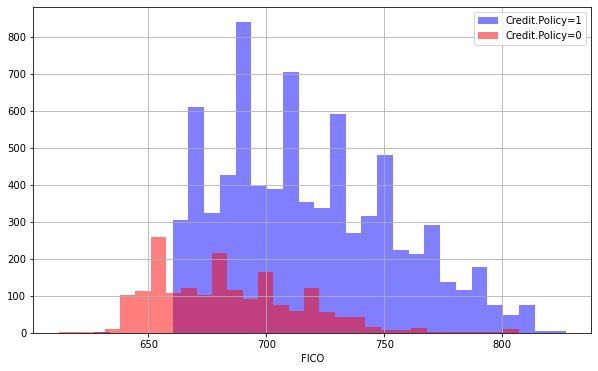

In [9]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

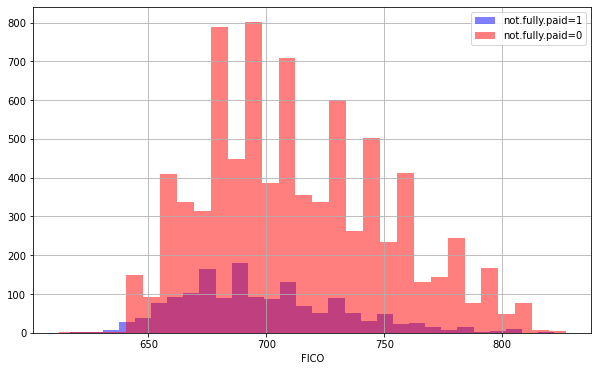

In [10]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

In [11]:
purpose=list(loans['purpose'].unique())
purpose

['debt_consolidation',
 'credit_card',
 'all_other',
 'home_improvement',
 'small_business',
 'major_purchase',
 'educational']

<AxesSubplot:xlabel='purpose', ylabel='count'>

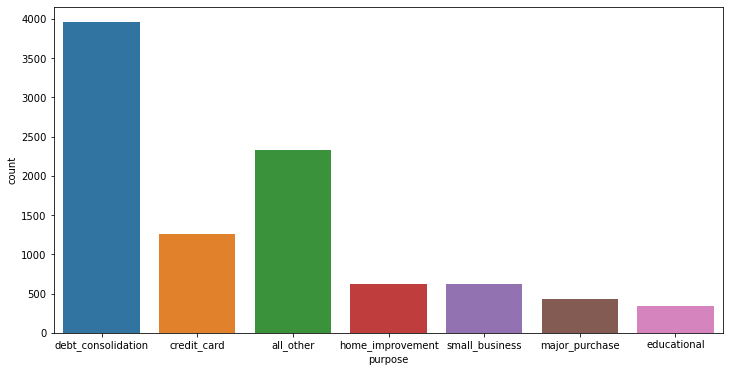

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(loans['purpose'])

In [13]:
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

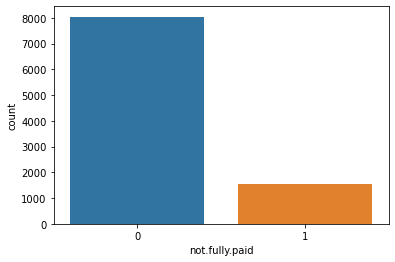

In [14]:
sns.countplot(loans['not.fully.paid'])

<AxesSubplot:xlabel='purpose', ylabel='count'>

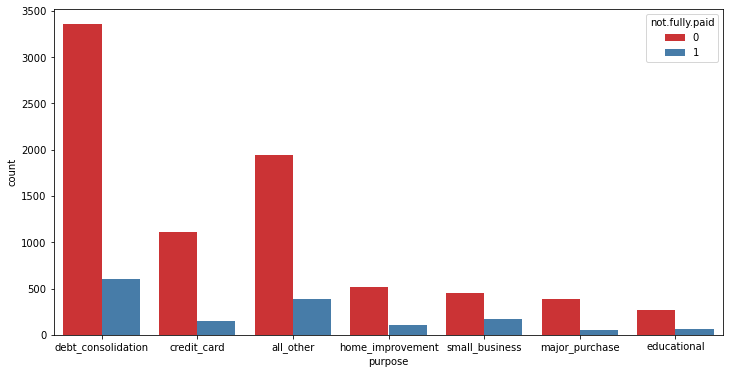

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x=loans['purpose'],hue=loans['not.fully.paid'],palette='Set1')

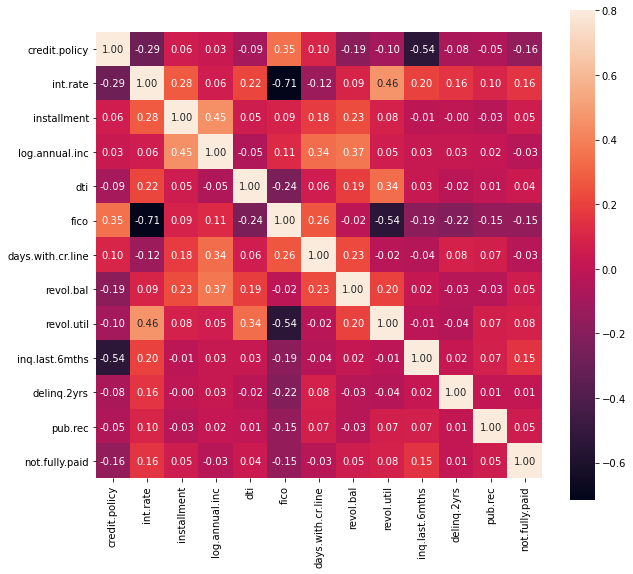

In [16]:
corrmat=loans.corr()
plt.subplots(figsize=(10, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10});

In [17]:
loans[['int.rate','inq.last.6mths','revol.util']].describe()

,int.rate,inq.last.6mths,revol.util
count,9578.000000,9578.000000,9578.000000
mean,0.122640,1.577469,46.799236
std,0.026847,2.200245,29.014417
min,0.060000,0.000000,0.000000
25%,0.103900,0.000000,22.600000
50%,0.122100,1.000000,46.300000
75%,0.140700,2.000000,70.900000
max,0.216400,33.000000,119.000000


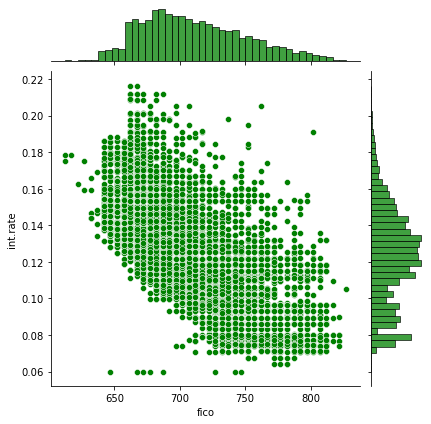

In [18]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='green')

<Figure size 792x504 with 0 Axes>

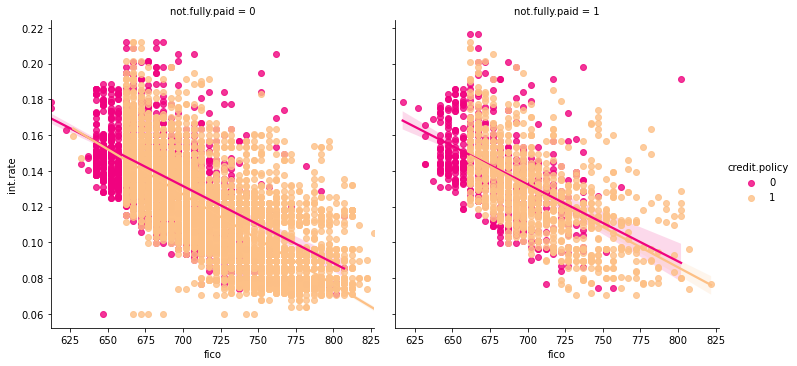

In [19]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Accent_r')

In [20]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [22]:
label_encoder=LabelEncoder()
loans['purpose']=label_encoder.fit_transform(loans['purpose'])

In [23]:
loans['purpose'].dtype

dtype('int32')

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
predict_rfc = rfc.predict(X_test)

## Training a Logistic Regession Model

In [28]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [29]:
predict_Log=log.predict(X_test)

In [30]:
#importing a Support Vector machine
from sklearn.svm import SVC
svm=SVC(gamma='auto')
svm.fit(X_train,y_train)

SVC(gamma='auto')

In [31]:
predict_svm=svm.predict(X_test)

## Predictions and Evaluation of All Models

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [33]:
print('\t\t CLASSIFICATION REPORT- Random Forest')
print(classification_report(y_test,predict_rfc))
print('\t  CLASSIFICATION REPORT- Logistic Regression')
print(classification_report(y_test,predict_Log))

		 CLASSIFICATION REPORT- Random Forest
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.48      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

	  CLASSIFICATION REPORT- Logistic Regression
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.61      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.73      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



Text(0.5, 1.0, 'Confusion Matrix-Random Forest')

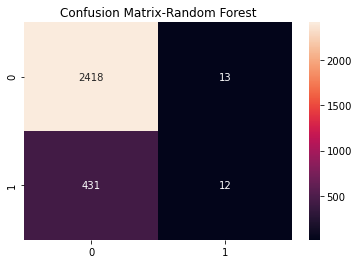

In [34]:
sns.heatmap(confusion_matrix(y_test,predict_rfc),annot=True,fmt='')
plt.title('Confusion Matrix-Random Forest')

Text(0.5, 1.0, 'Confusion Matrix-Logistic Regression')

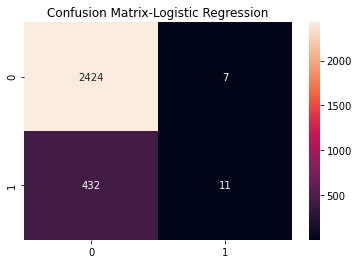

In [35]:
sns.heatmap(confusion_matrix(y_test,predict_Log),annot=True,fmt='')
plt.title('Confusion Matrix-Logistic Regression')

In [36]:
print('Accuracy Score of Random Forest Classifier: {:.2f}'.format(accuracy_score(y_test,predict_rfc)))
print('Accuracy Score of Logistic Regression Classifier: {:.2f}'.format(accuracy_score(y_test,predict_Log)))

Accuracy Score of Random Forest Classifier: 0.85
Accuracy Score of Logistic Regression Classifier: 0.85


**Conclusion:** As you can see the Logistic regression worked slightly better in this situation but thats not enougnh. We need to do a lot more feature engineering and try out differenet models in order to understand which is better. I hope you liked this notebook, if yes kindly leave an upvote. 
I'll be updating this notebook with time.